In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras import regularizers
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_absolute_error, r2_score

In [5]:
#download the data
file = pd.read_csv("D:\CPSC 597\ph-data.csv")

In [7]:
#split data into x variables
xdata=file.drop("label", axis='columns')
#split data into y variables
ydata=file["label"]
#X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.10, random_state = None)

In [8]:
#split into testing and variables
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.10, random_state = None)

In [9]:
#reformat the y variables to adjust shape
y_train= pd.get_dummies(y_train, columns=['label'])
y_test= pd.get_dummies(y_test, columns=['label'])
#y_test=pd.get_dummies(y_test, columns=['label'])

In [12]:
#build the model
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid', input_shape=[len(X_train.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'),
    layers.Dense(15)
  ])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 15)                255       
                                                                 
Total params: 1,363
Trainable params: 1,363
Non-trainable params: 0
_________________________________________________________________


In [13]:
#fit the model
history = model.fit(x=X_train, y=y_train, 
                    validation_split=0.2, 
                    epochs=2000, 
                    batch_size=2048, 
                    verbose=0,
                    callbacks = None,
                    shuffle=True)

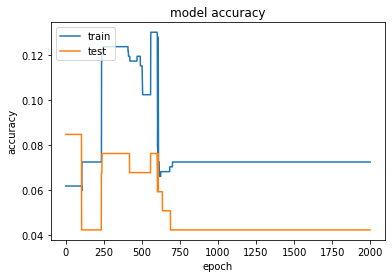

In [15]:
#plot training and validation loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()